# Computer Vision I

## CLASE 5

## Referencias

- [Cheatsheet de Latex](https://www.caam.rice.edu/~heinken/latex/symbols.pdf)
- [DRIVE](https://drive.google.com/drive/folders/1TDRvlwfSgLI39gHXgVhWlSaRJ-aTSaDE?usp=sharing)

## Comentarios sobre el estado del documento

## Importar librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import inspect
from matplotlib.image import imread

import cv2 as cv

%matplotlib inline

## Enunciados

Para las imágenes suministradas:
1. Implementar un extractor de características LBP básico (sin uniformidad, 8 vecinos)
2. Realizar el histograma de características LBP de la imagen
3. Comparar los histogramas

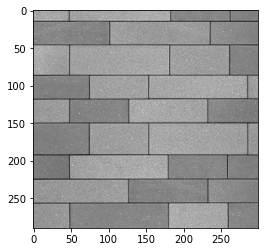

In [2]:
file = inspect.getframeinfo(inspect.currentframe()).filename
os.path.dirname(os.path.realpath(file))


FILE_PATH_GEN = [*os.walk('./Imagenes/C_5/')]

bricks = imread(FILE_PATH_GEN[0][0]+FILE_PATH_GEN[0][2][0])

bricks = cv.cvtColor(bricks, cv.COLOR_BGR2GRAY)

plt.imshow(bricks, cmap='gray')

### 1. Implementación de LBP

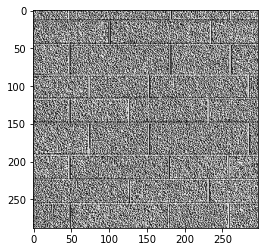

In [3]:
# Defino la función lbp

def lbp(img):
    n, m = img.shape
    lbp_image = np.zeros([n-2,m-2])
    
    power_matrix = np.array([[1, 2, 4], [128, 0, 8], [64, 32, 16]])
    
    for i in range(1,n-1):
        for j in range (1,m-1):
            pixel = img[i, j]
            window = img[i-1:i+2,j-1:j+2]
            window = (window - pixel) >= 0
            
            lpb_value = np.sum(window * power_matrix)
            
            lbp_image[i-1,j-1] =  lpb_value

    return lbp_image
            
lbp_image = lbp(bricks)

plt.imshow(lbp_image, cmap='gray')

### 2. Realizar el histograma de características LBP de la imagen

(array([19015.,  5101.,  5340.,  3654.,  7402.,  7909.,  3623.,  5531.,
         5974., 21987.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

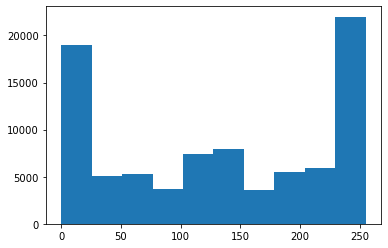

In [4]:
plt.hist(lbp_image.flatten())

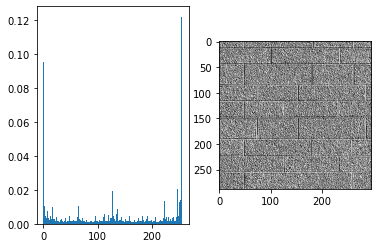

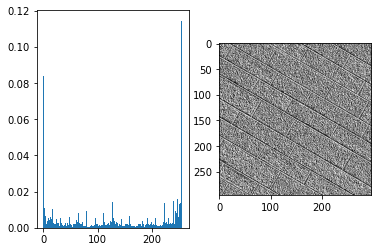

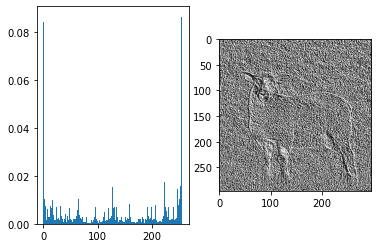

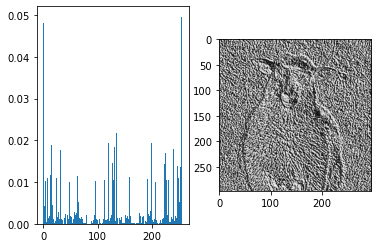

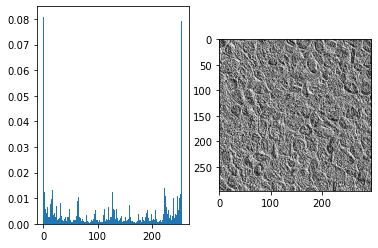

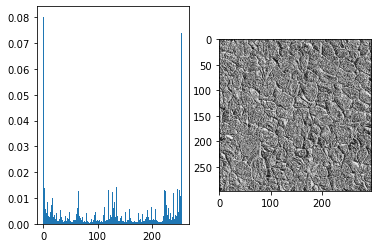

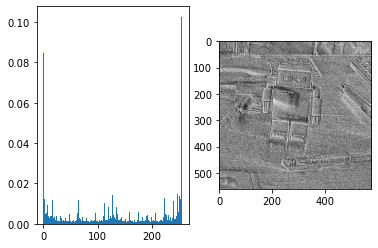

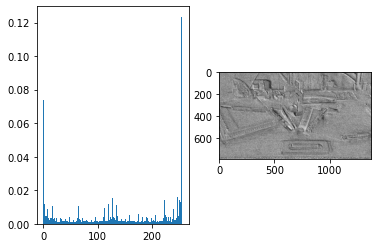

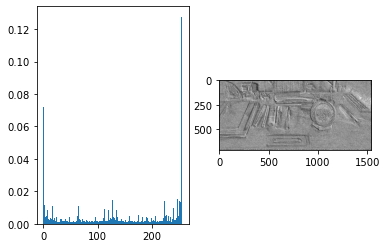

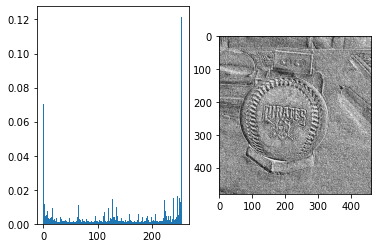

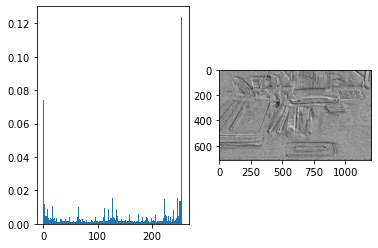

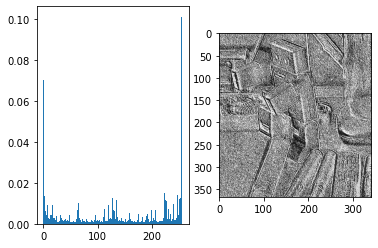

In [7]:
IMAGES_PATH = []
for image in FILE_PATH_GEN[0][2]:
    IMAGES_PATH.append(FILE_PATH_GEN[0][0]+image)
   

lbp_images = []

probs = []
bins = []

for i, image in enumerate(IMAGES_PATH):
        image = imread(image)
        image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
        image = lbp(image)
        lbp_images.append(image)
        plt.figure(i)
        
        plt.subplot(121)
        p, b, _ = plt.hist(image.flatten(), density=True, bins=256)
        
        probs.append(p)
        bins.append(b)
        
        plt.subplot(122)
        plt.imshow(image, cmap='gray')
plt.show()

In [10]:
# Calculo la distancia entre las distribuciones de los histogramas utilizando dkl

probs = np.array(probs)

n = len(IMAGES_PATH)

dkl = np.zeros([n,n])

for i, p in enumerate(probs):
    for j, q in enumerate(probs):
        dkl[i,j] = np.sum(p * np.log((p+ 0.000000000001)/(q + 0.000000000001) ))

        
A = dkl.argsort()
print(A)

[[ 0  7  6 10  8  9  1 11  2  4  5  3]
 [ 1  9  6  2  4  8  7 10  0  5 11  3]
 [ 2  4  5  1 11  6  9  8 10  7  0  3]
 [ 3  2  5  4 11  9  6  1  8  7 10  0]
 [ 4  5  2 11  6  9  8 10  7  1  0  3]
 [ 5 11  4  9  6  2  8 10  7  1  0  3]
 [ 6  7 10  8  9 11  0  5  4  1  2  3]
 [ 7 10  8  6  9  0 11  5  4  1  2  3]
 [ 8 10  7  9  6 11  0  5  4  1  2  3]
 [ 9  8  7 10  6 11  5  0  4  1  2  3]
 [10  8  7  6  9 11  0  5  4  1  2  3]
 [11  5  9  8 10  6  4  7  2  0  1  3]]


La divergencia de kullback leibler arroja la distancia entre dos distribuciones. Al haber calculado la matriz dkl, se obtuvo las distancais de todas las combinaciones posibles de imágenes.
Esto arroja una matriz que al ordenar los elementos de sus filas y tomar sus argumentos, debería ilustrar la divergencia entre las imágenes (matiz A) y consiguientemente, cuantificar la simulitud entre estas imágenes según este descriptor.

El resultado esperado es que el primer elemento de cada fila sea igual al numero de fila (esto se valida) esto se debe a que entropía entre una distribución y ella misma es de 0.
Por otro lado, sería esperable que el segundo elemento de cada fila corresponda al índice de la imágen de la misma tipología del set (ej. obeja con obeja, ladrillo con ladrillo). 
Esto se valida en algunas de las comparaciones, pero no arroja una tendencia clara. Se presume que el tamaño de la ventana elegida (toda la imagen) para elaborar el histograma es muy grande, lo que podría llevar a que se "diluya" la información clave de la imágen (como podría ser el histograma de la pelota de baseball).